# Introduction

This notebook trains a linear discriminant analysis model on preprocessed EEG data to predict behavioral data from neural features.

An example of this can be found in the paper, "Human stereoEEG recordings reveal network dynamics of decision-making in a rule-switching task" by Wal et al.

Behavioral data and preprocessed neural data from Subject 06 in the NCSL EFRI datasetwill be used in this notebook.

# Setup

## Imports

In [1]:
import h5py 
import mat73
import numpy as np

from lda_ import LDA

## Load File Paths

In [2]:
# ncsl_share = '/run/user/1000/gvfs/smb-share:server=10.162.37.21,share=main'
# data_path = f'Data/Subject06_snapshot_normalized.npy'
subs = ['06']
file_paths = {}

for sub in subs:
    # create a dictionary holding the file paths
    ncsl_share = '/mnt/ncsl_share'
    file_paths[sub] = {
        'setup_path': ncsl_share + f'/Public/EFRI/1_formatted/SUBJECT{sub}/EFRI{sub}_WAR_SES1_Setup.mat',
        'raw_path': ncsl_share + f'/Public/EFRI/1_formatted/SUBJECT{sub}/EFRI{sub}_WAR_SES1_Raw.mat',
        'data_path': ncsl_share + f'/Daniel/Data/Trial_by_Chan_by_Freq_by_Time_Snapshots/Subject{sub}_snapshot_normalized.npy', # movement onset as event
        # 'data_path' : ncsl_share + f'/Daniel/Data/Trial_by_Chan_by_Freq_by_Time_Snapshots/show-card_pre-2sec_post-4sec/Subject{sub}_snapshot_normalized.npy', # visual cue as event
        'out_path_metrics': f'Metrics/Subject{sub}',
        'out_path_plots': f'Plots/Subject{sub}'
    }

In [3]:
raw_file = h5py.File(file_paths['06']['raw_path'])
setup_data = mat73.loadmat(file_paths['06']['setup_path'])

out_path_plots = file_paths['06']['out_path_plots']
out_path_metrics = file_paths['06']['out_path_metrics']

In [4]:
setup_data.keys()

dict_keys(['elec_area', 'elec_ind', 'elec_name', 'filters', 'trial_times', 'trial_words'])

## Instantiate variables

In [5]:
bets = setup_data['filters']['bets']

good_trials = np.where(np.isnan(bets) == False)[0] # extract indices of trials without the 'nan'

bets = bets[good_trials] # get the bet values for the good trials
subject_cards = setup_data['filters']['card1'][good_trials] # get the subject's card values for the good trials

In [6]:
elec_names = np.array(setup_data['elec_name'])
elec_areas = np.array(setup_data['elec_area'])

In [7]:
data = np.load(file_paths['06']['data_path'])
y = np.asarray([(0 if bet == 5 else 1) for bet in bets]) # 0 = low bet ($5), 1 = high bet ($20)

## Matplotlib Settings

In [8]:
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

## Create Frequency Bands

In [9]:
wavelet_freqs = np.logspace(np.log2(2),np.log2(150),num=63,base=2)

frequency_band_indices ={
    "Delta" : [i for i,freq in enumerate(wavelet_freqs) if freq >= 0.5 and freq < 4],
    "Theta" : [i for i,freq in enumerate(wavelet_freqs) if freq >= 4 and freq < 8],
    "Alpha" : [i for i,freq in enumerate(wavelet_freqs) if freq >= 8 and freq < 14],
    "Beta" : [i for i,freq in enumerate(wavelet_freqs) if freq >= 14 and freq < 30],
    "Gamma" : [i for i,freq in enumerate(wavelet_freqs) if freq >= 30]
}

In [10]:
f_band_data = np.zeros((data.shape[0], data.shape[1], 5, data.shape[3]))

for i, key in enumerate(frequency_band_indices):
    f_band_data[:,:,i,:] = data[:,:,frequency_band_indices[key],:].mean(2)

# Model Training

In [11]:
lda = LDA(data, setup_data)

In [12]:
lda.num_channels

133

In [13]:
from lda_ import TrainOptimalTimeWindows
trained_lda = TrainOptimalTimeWindows(data)

ValueError: cannot reshape array of size 1 into shape (133,20,newaxis)

In [13]:
trained_lda.time_resolution

5

In [ ]:
trained_lda.

In [19]:
trained_lda.train_per_channel_and_timestep(data = f_band_data,  y = y, time_resolution=5)

TypeError: PerChannelTimestep.train_per_channel_and_timestep() missing 1 required positional argument: 'self'

In [21]:
lda = LDA()
lda.train_per_channel_and_timestep(f_band_data, y, 5)

In [22]:
plots = PerChannelTimestep(lda, setup_data, True)

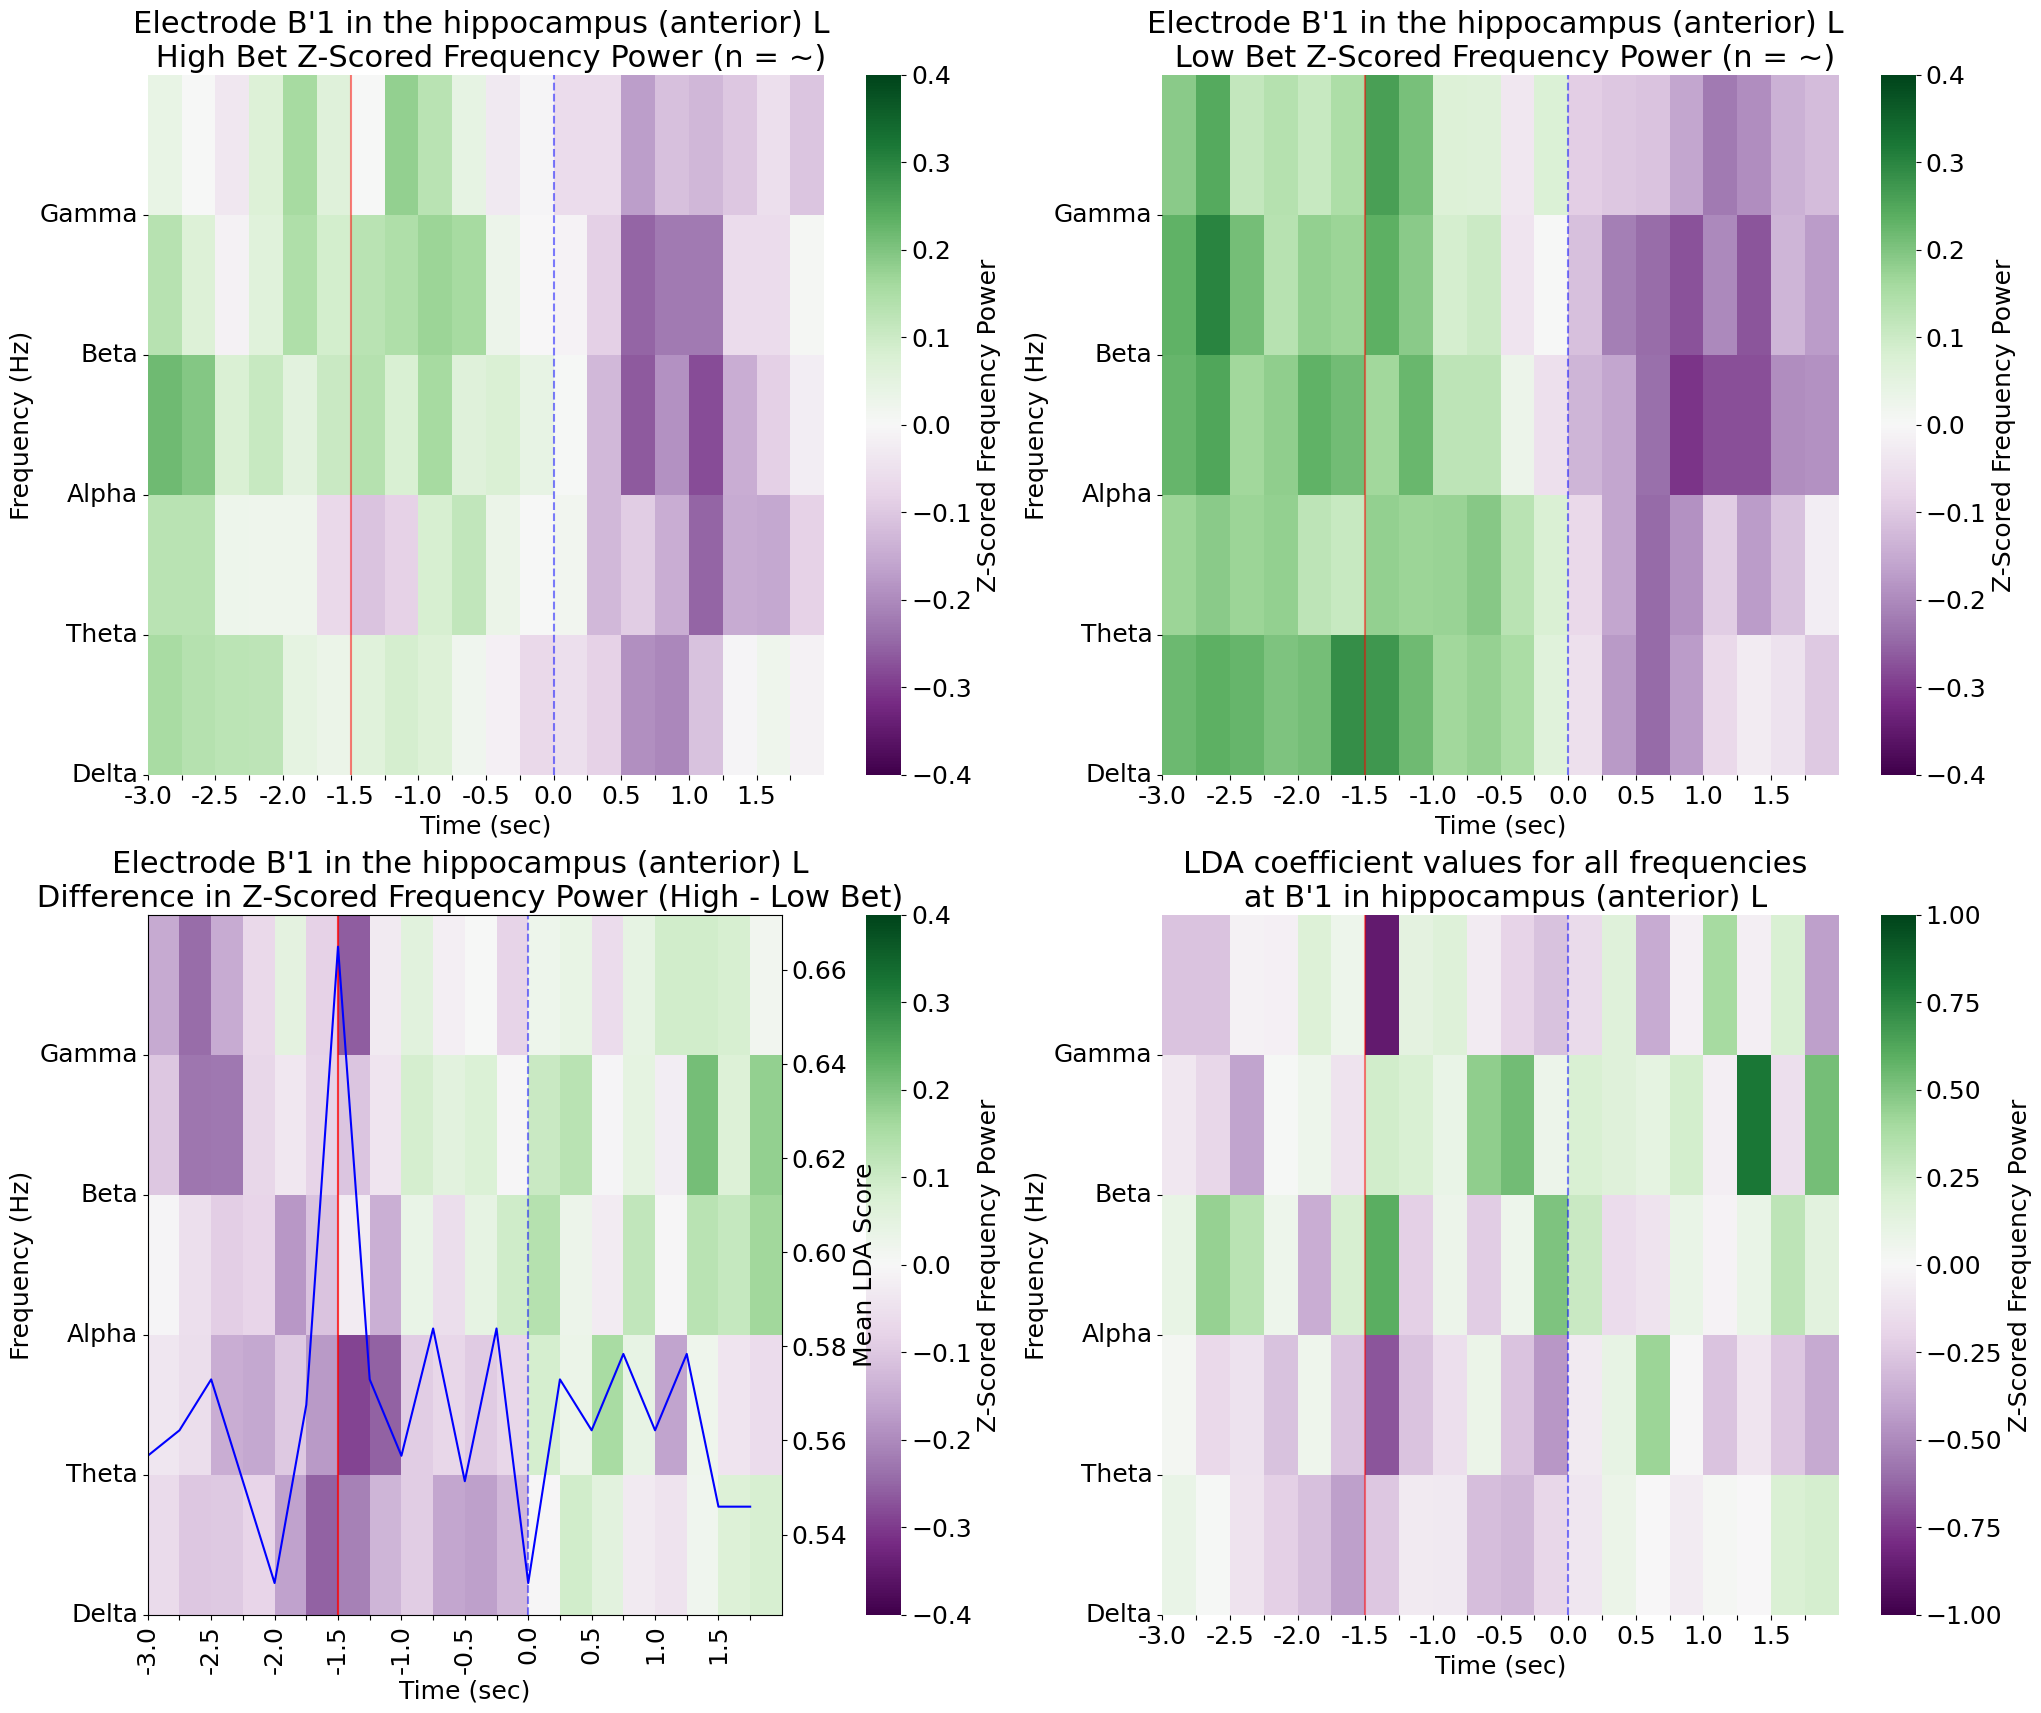

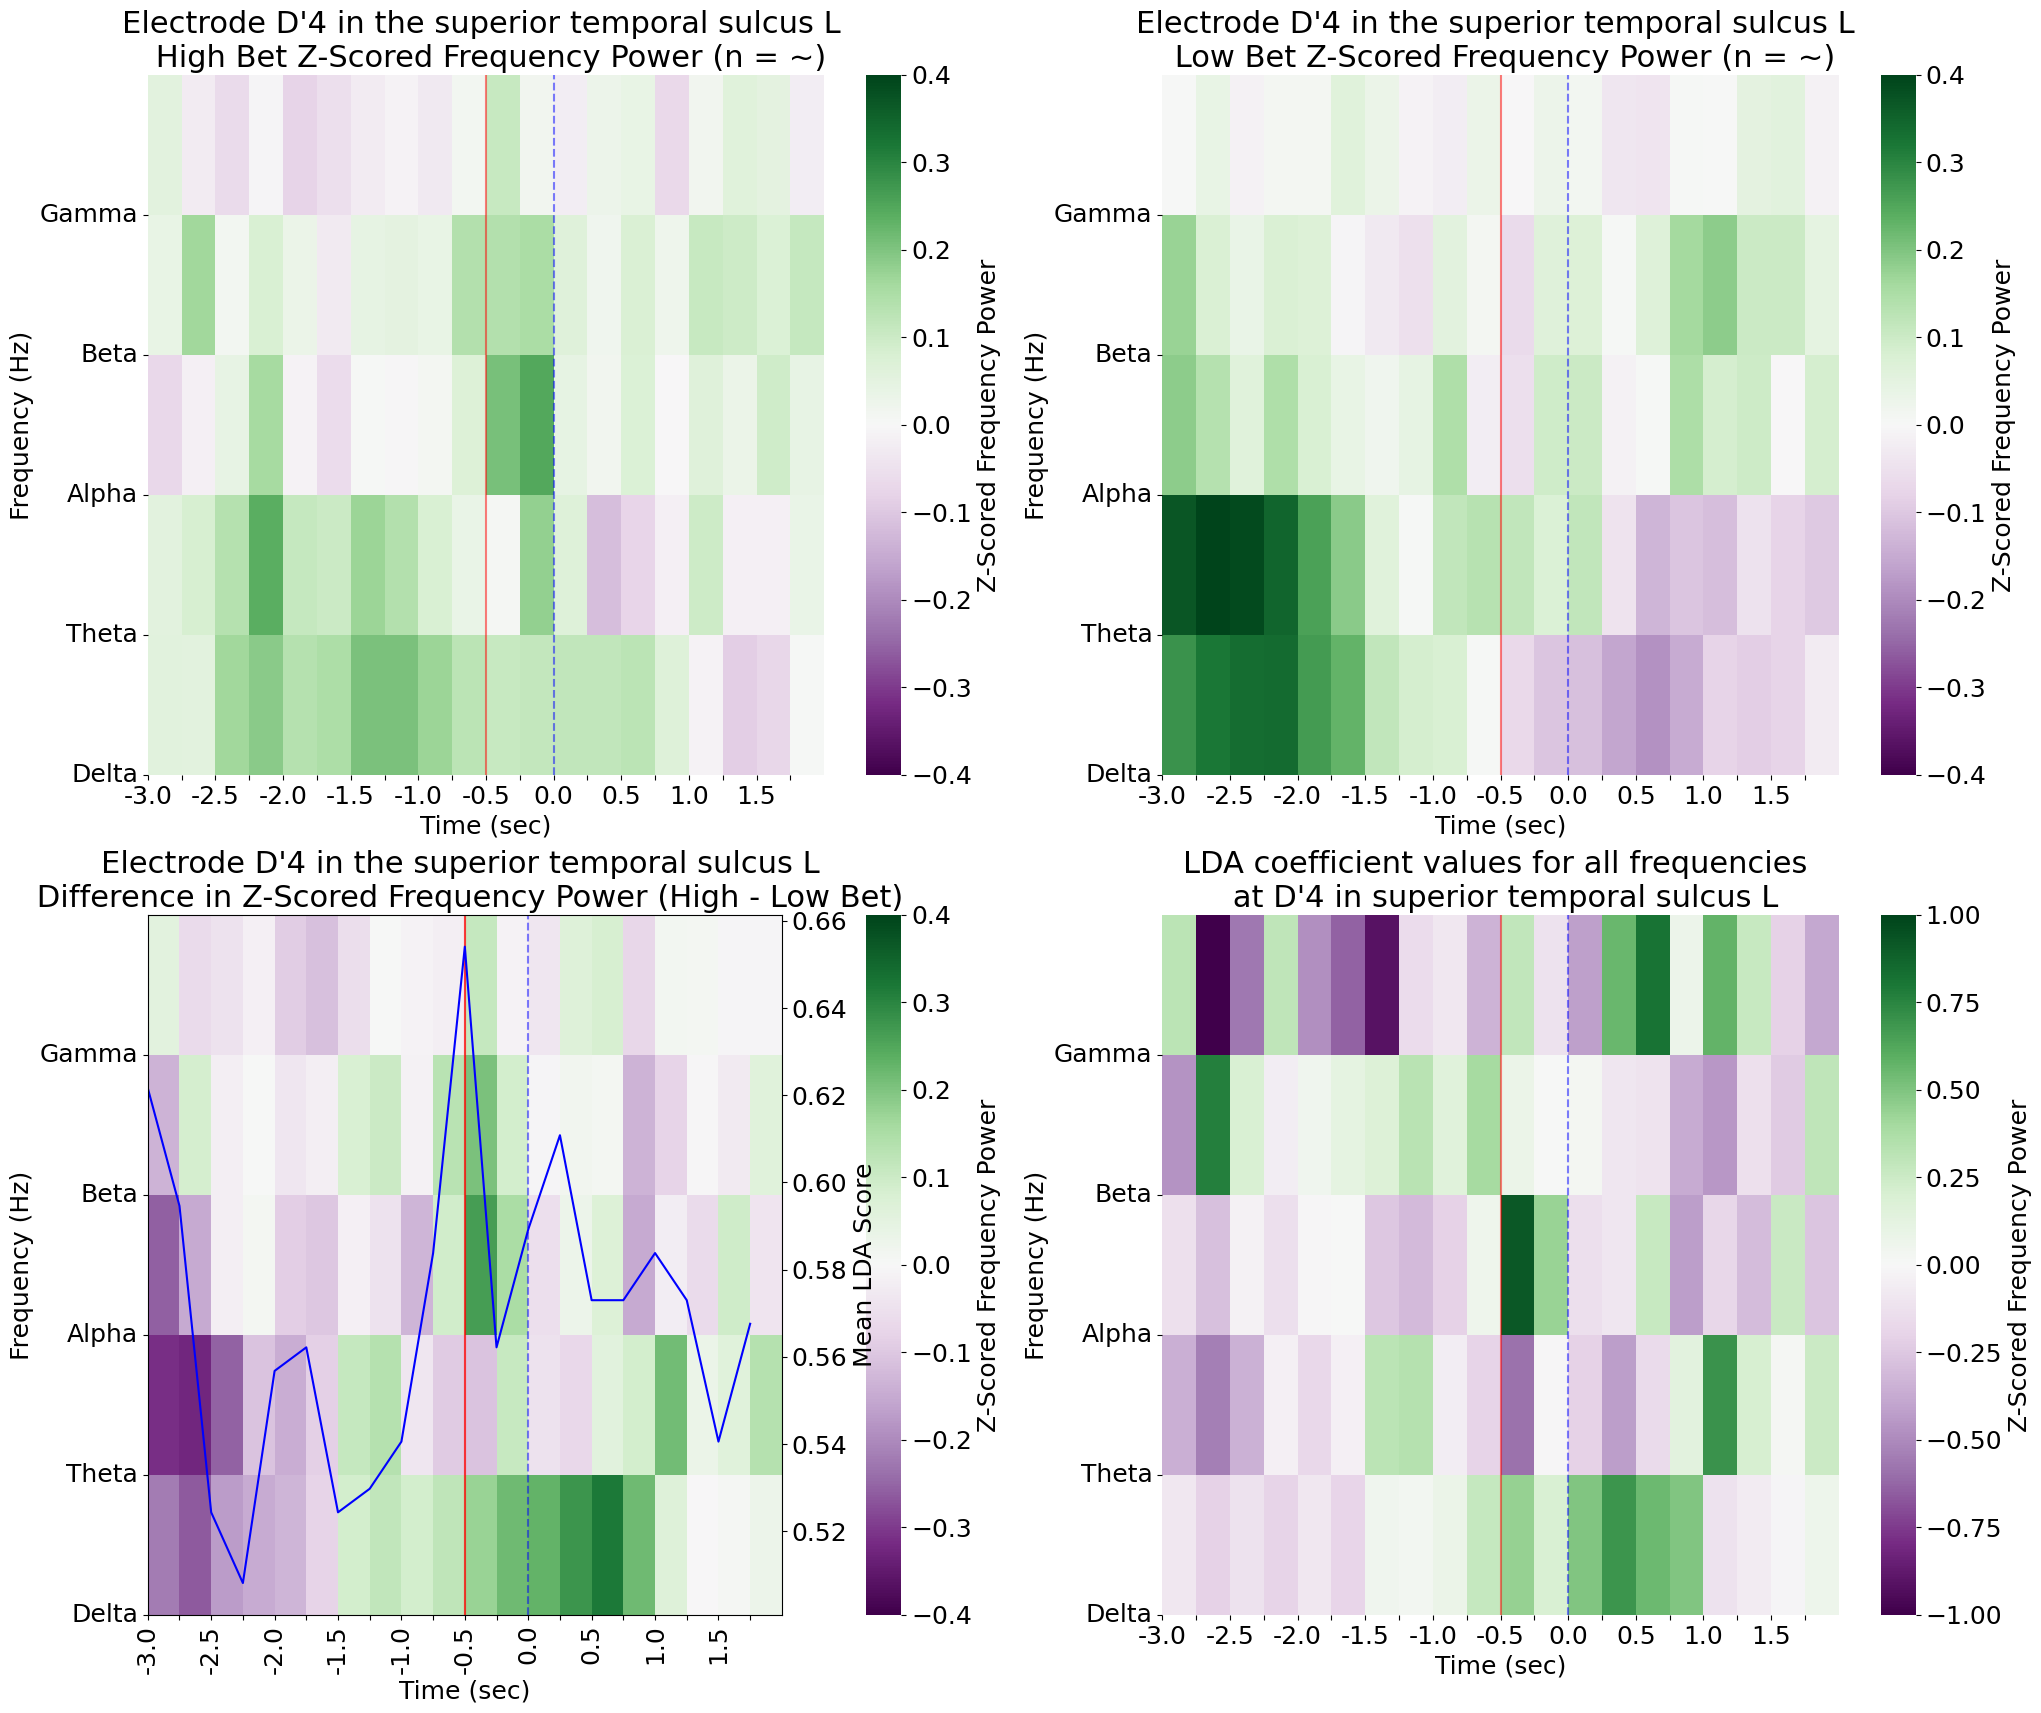

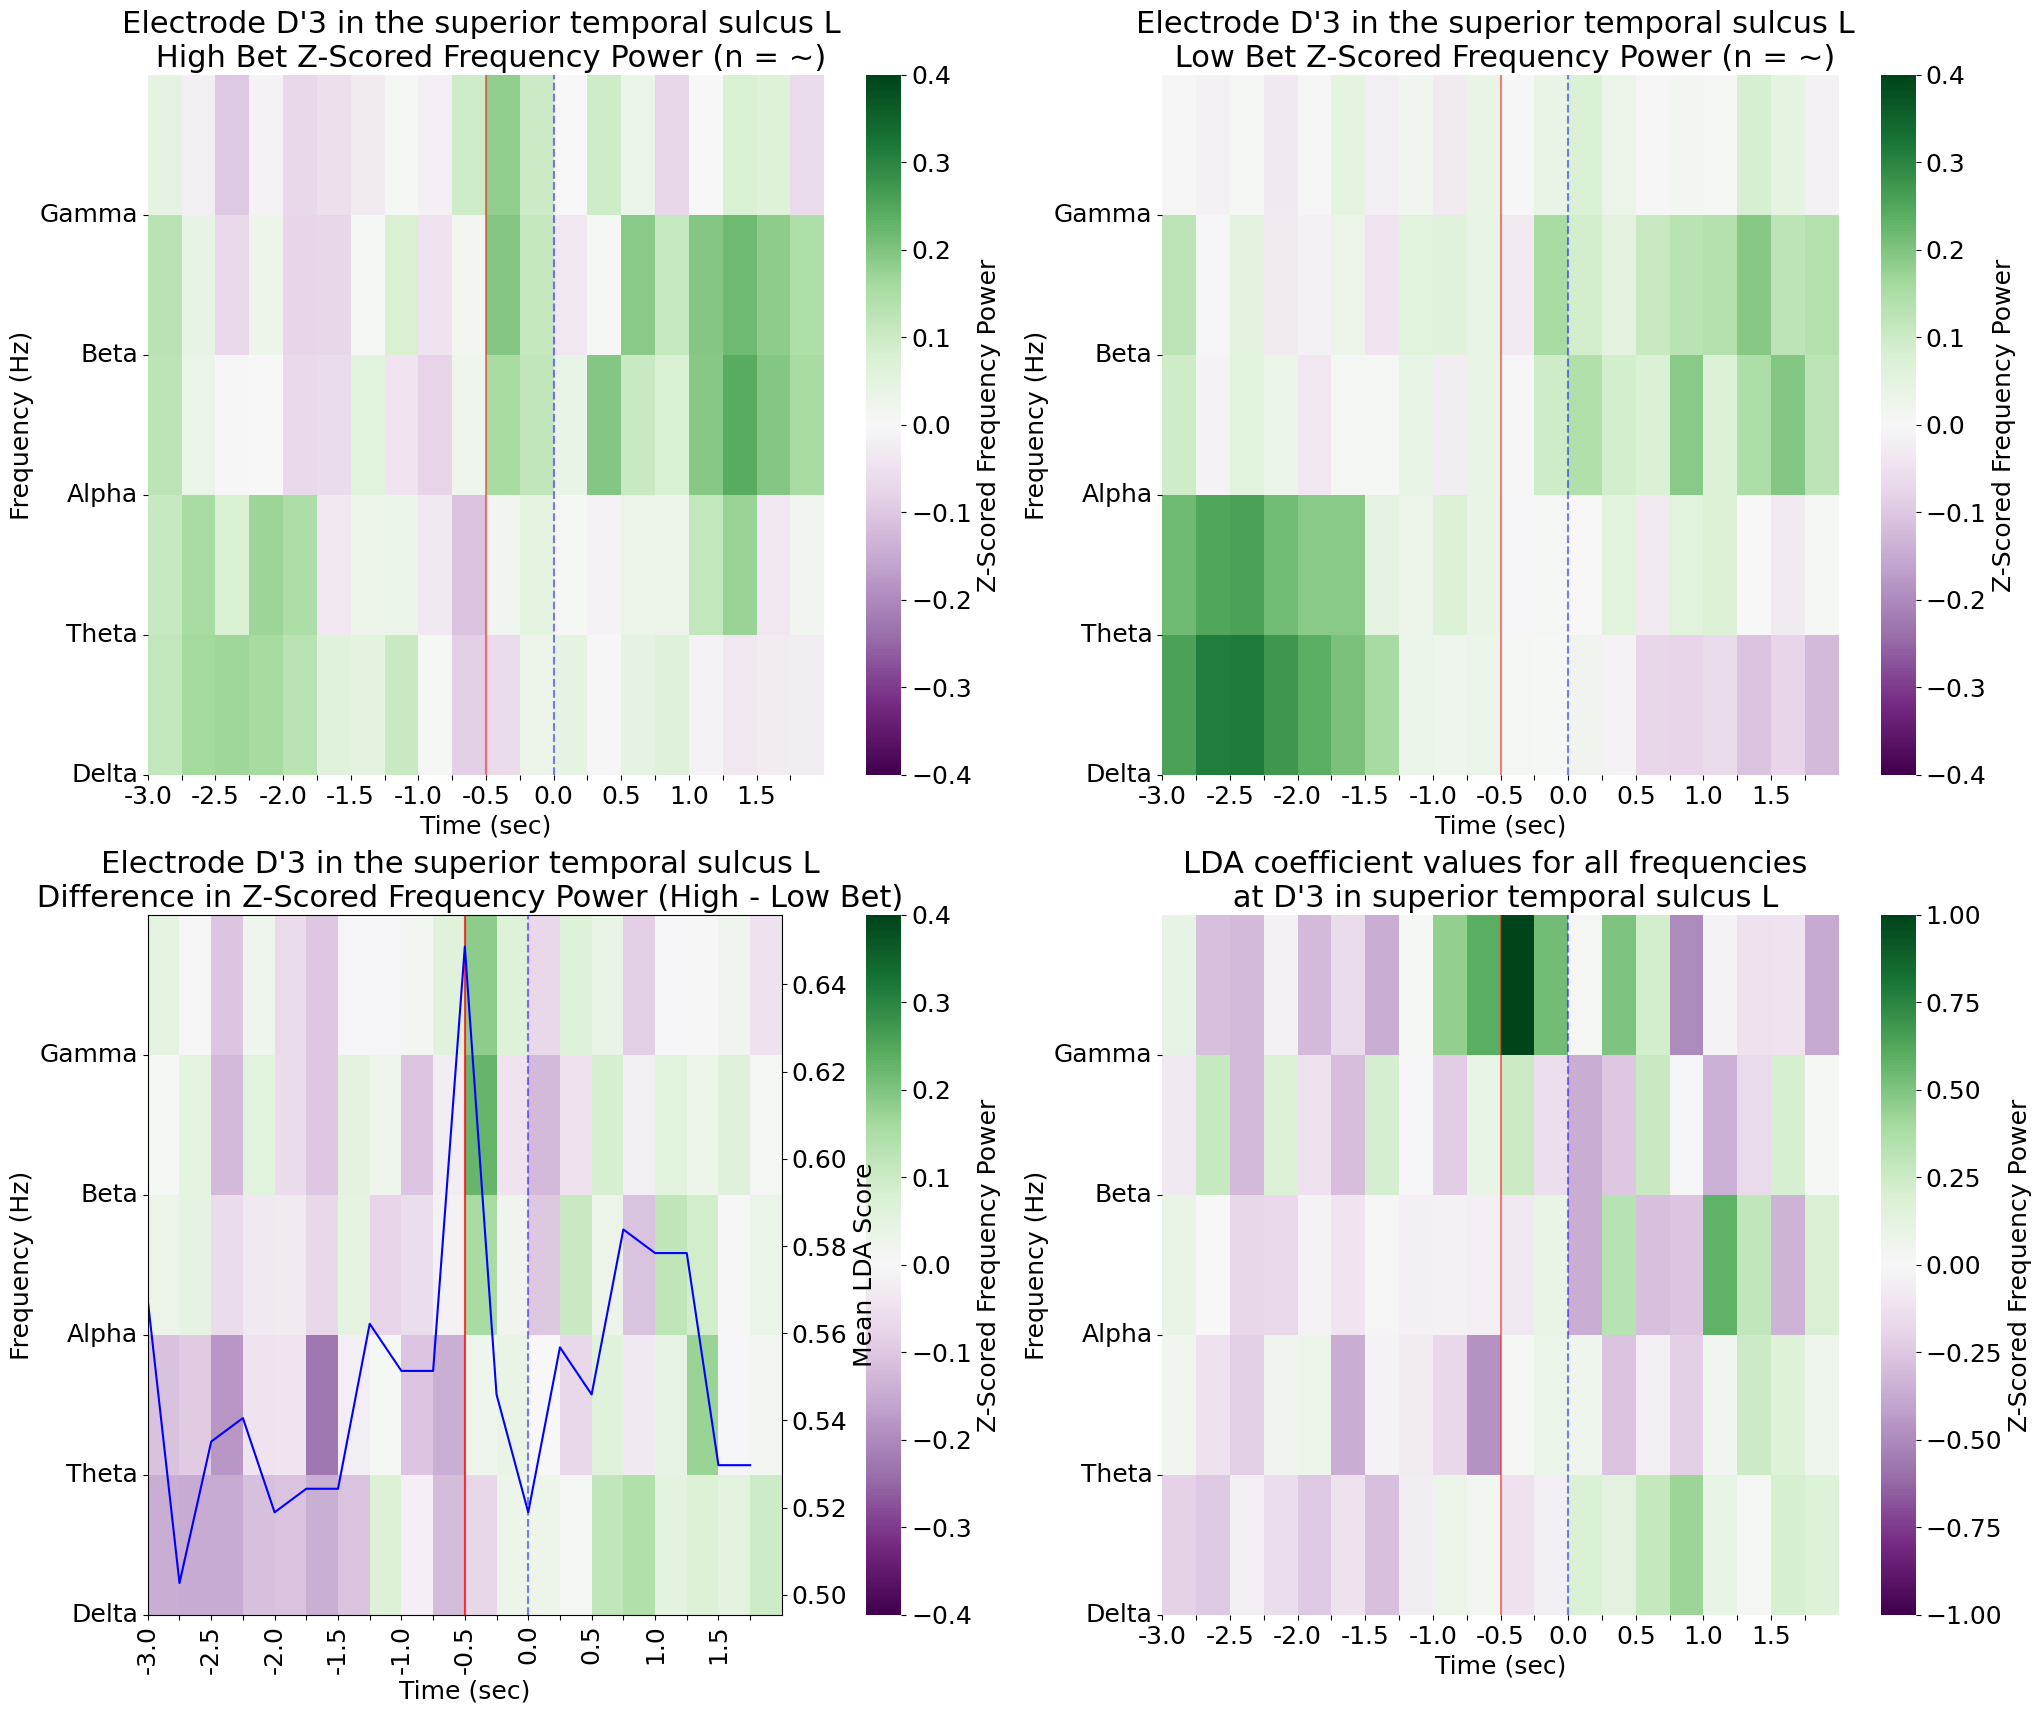

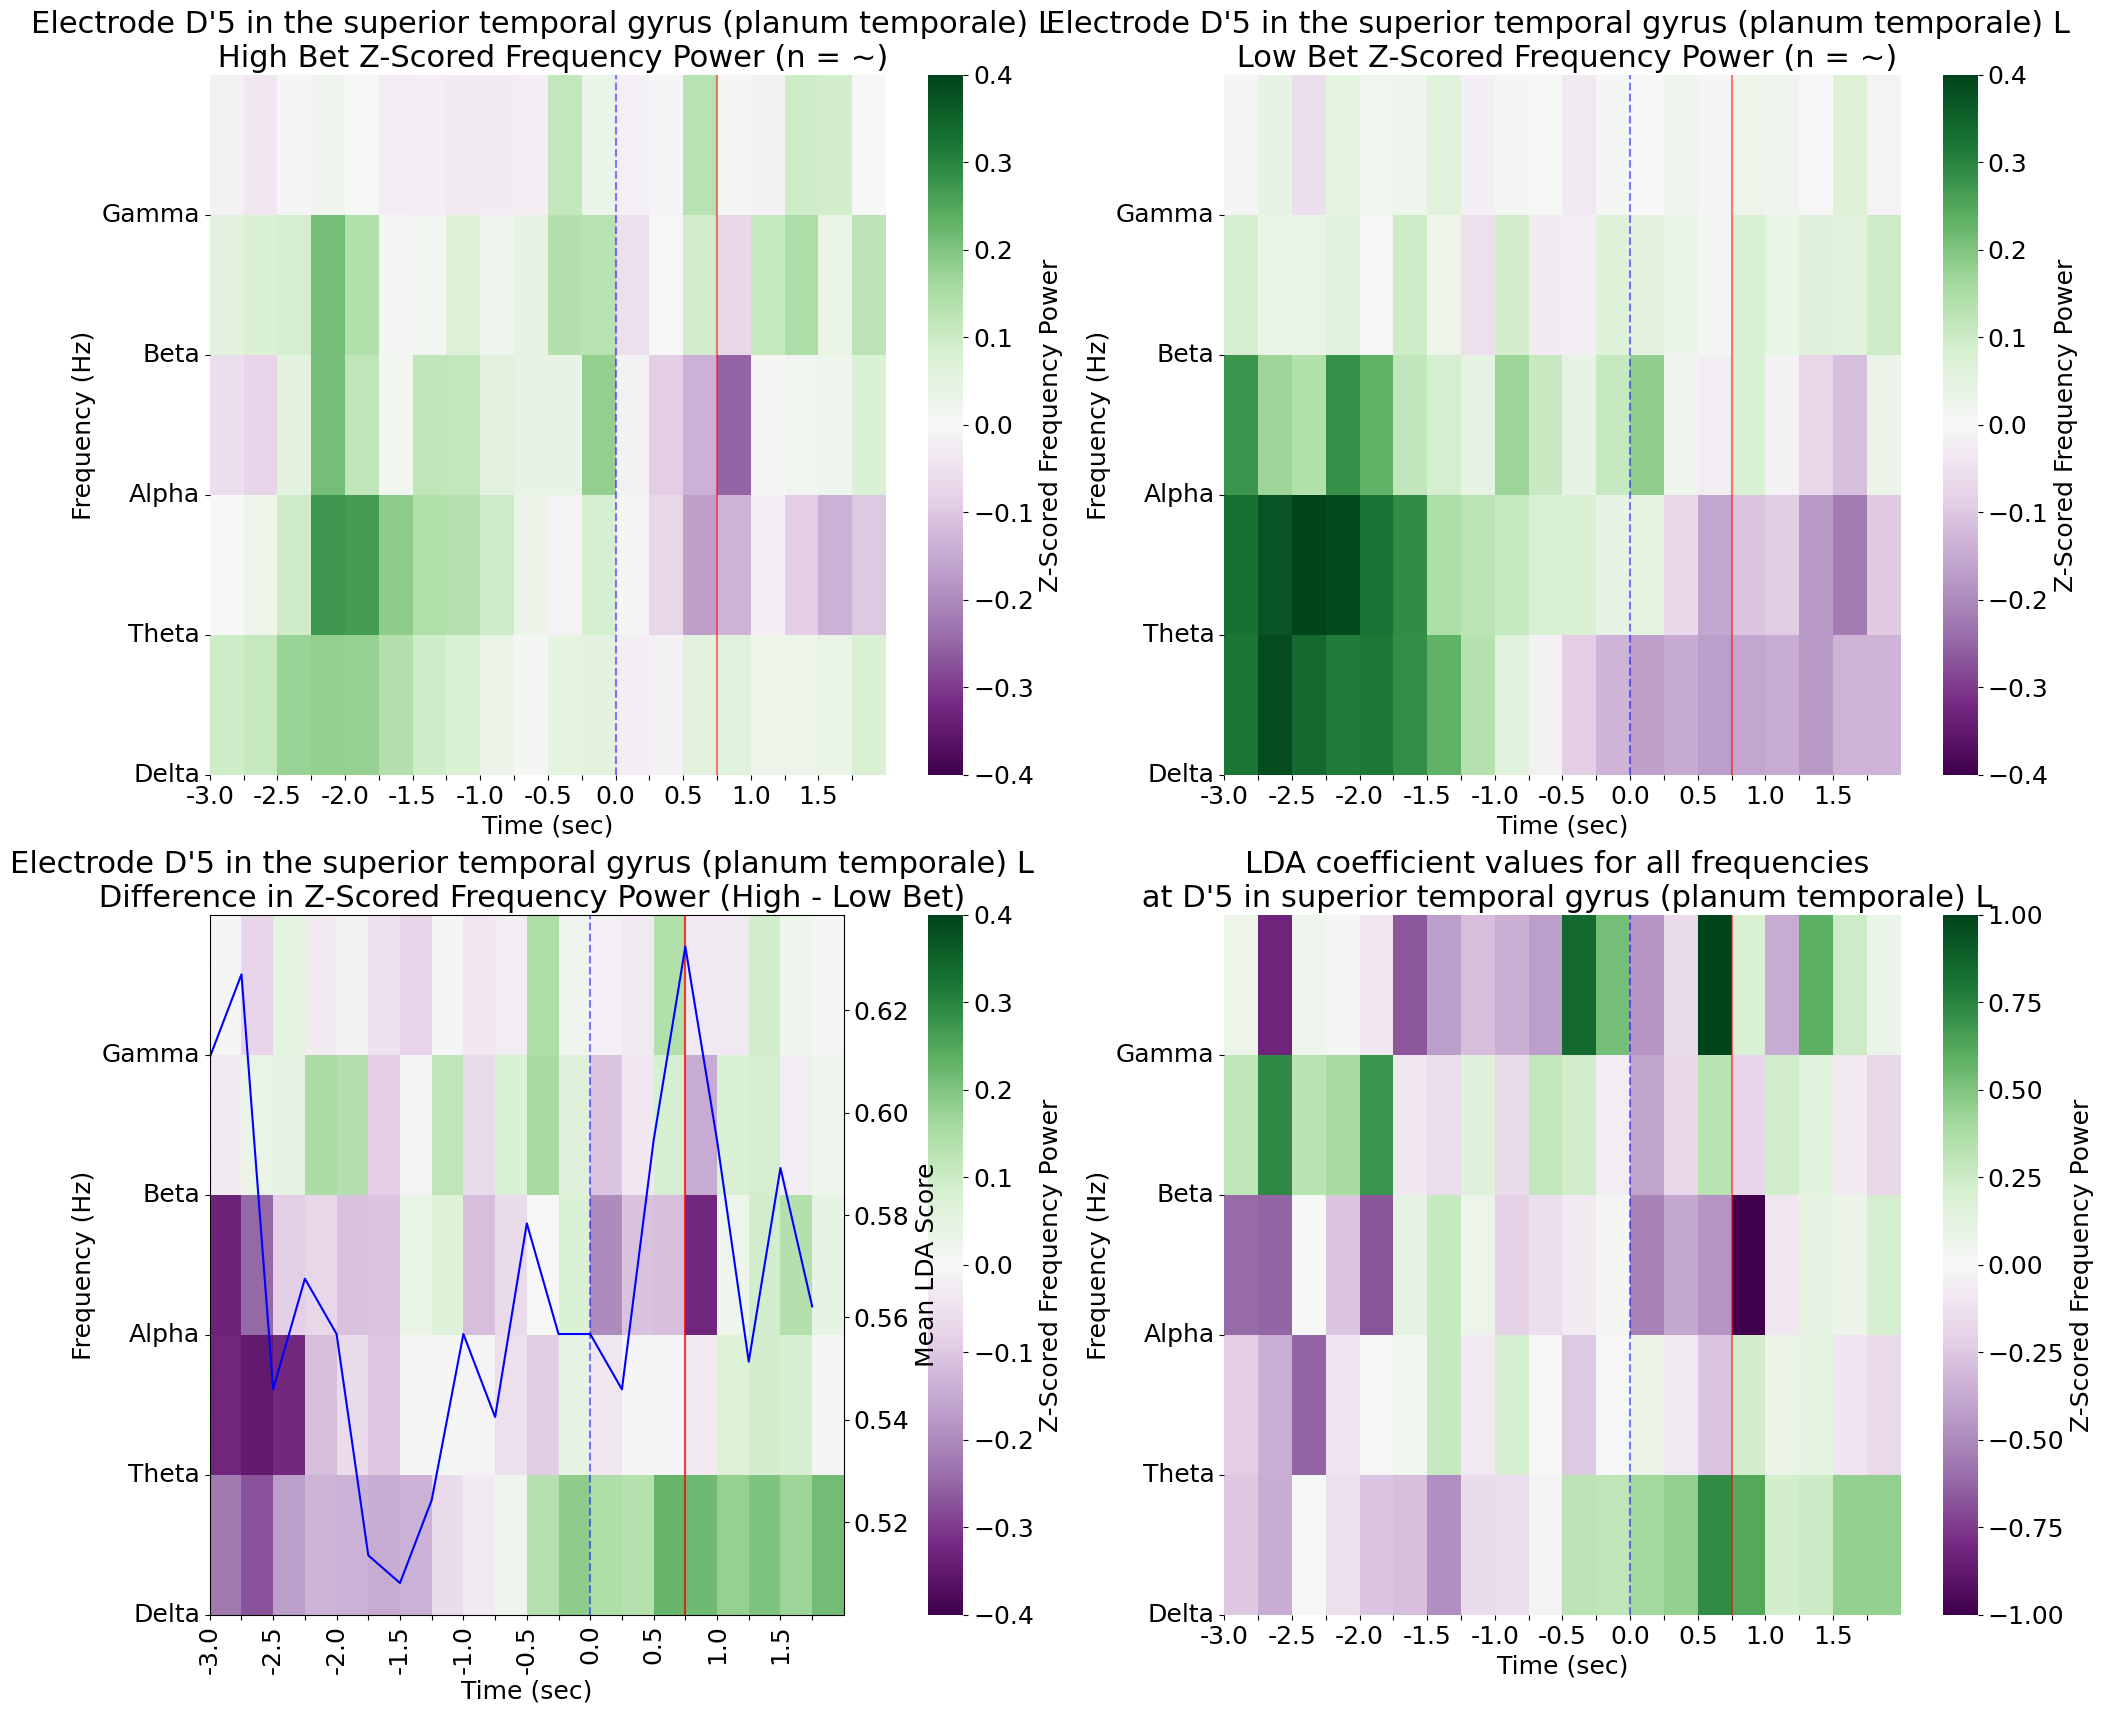

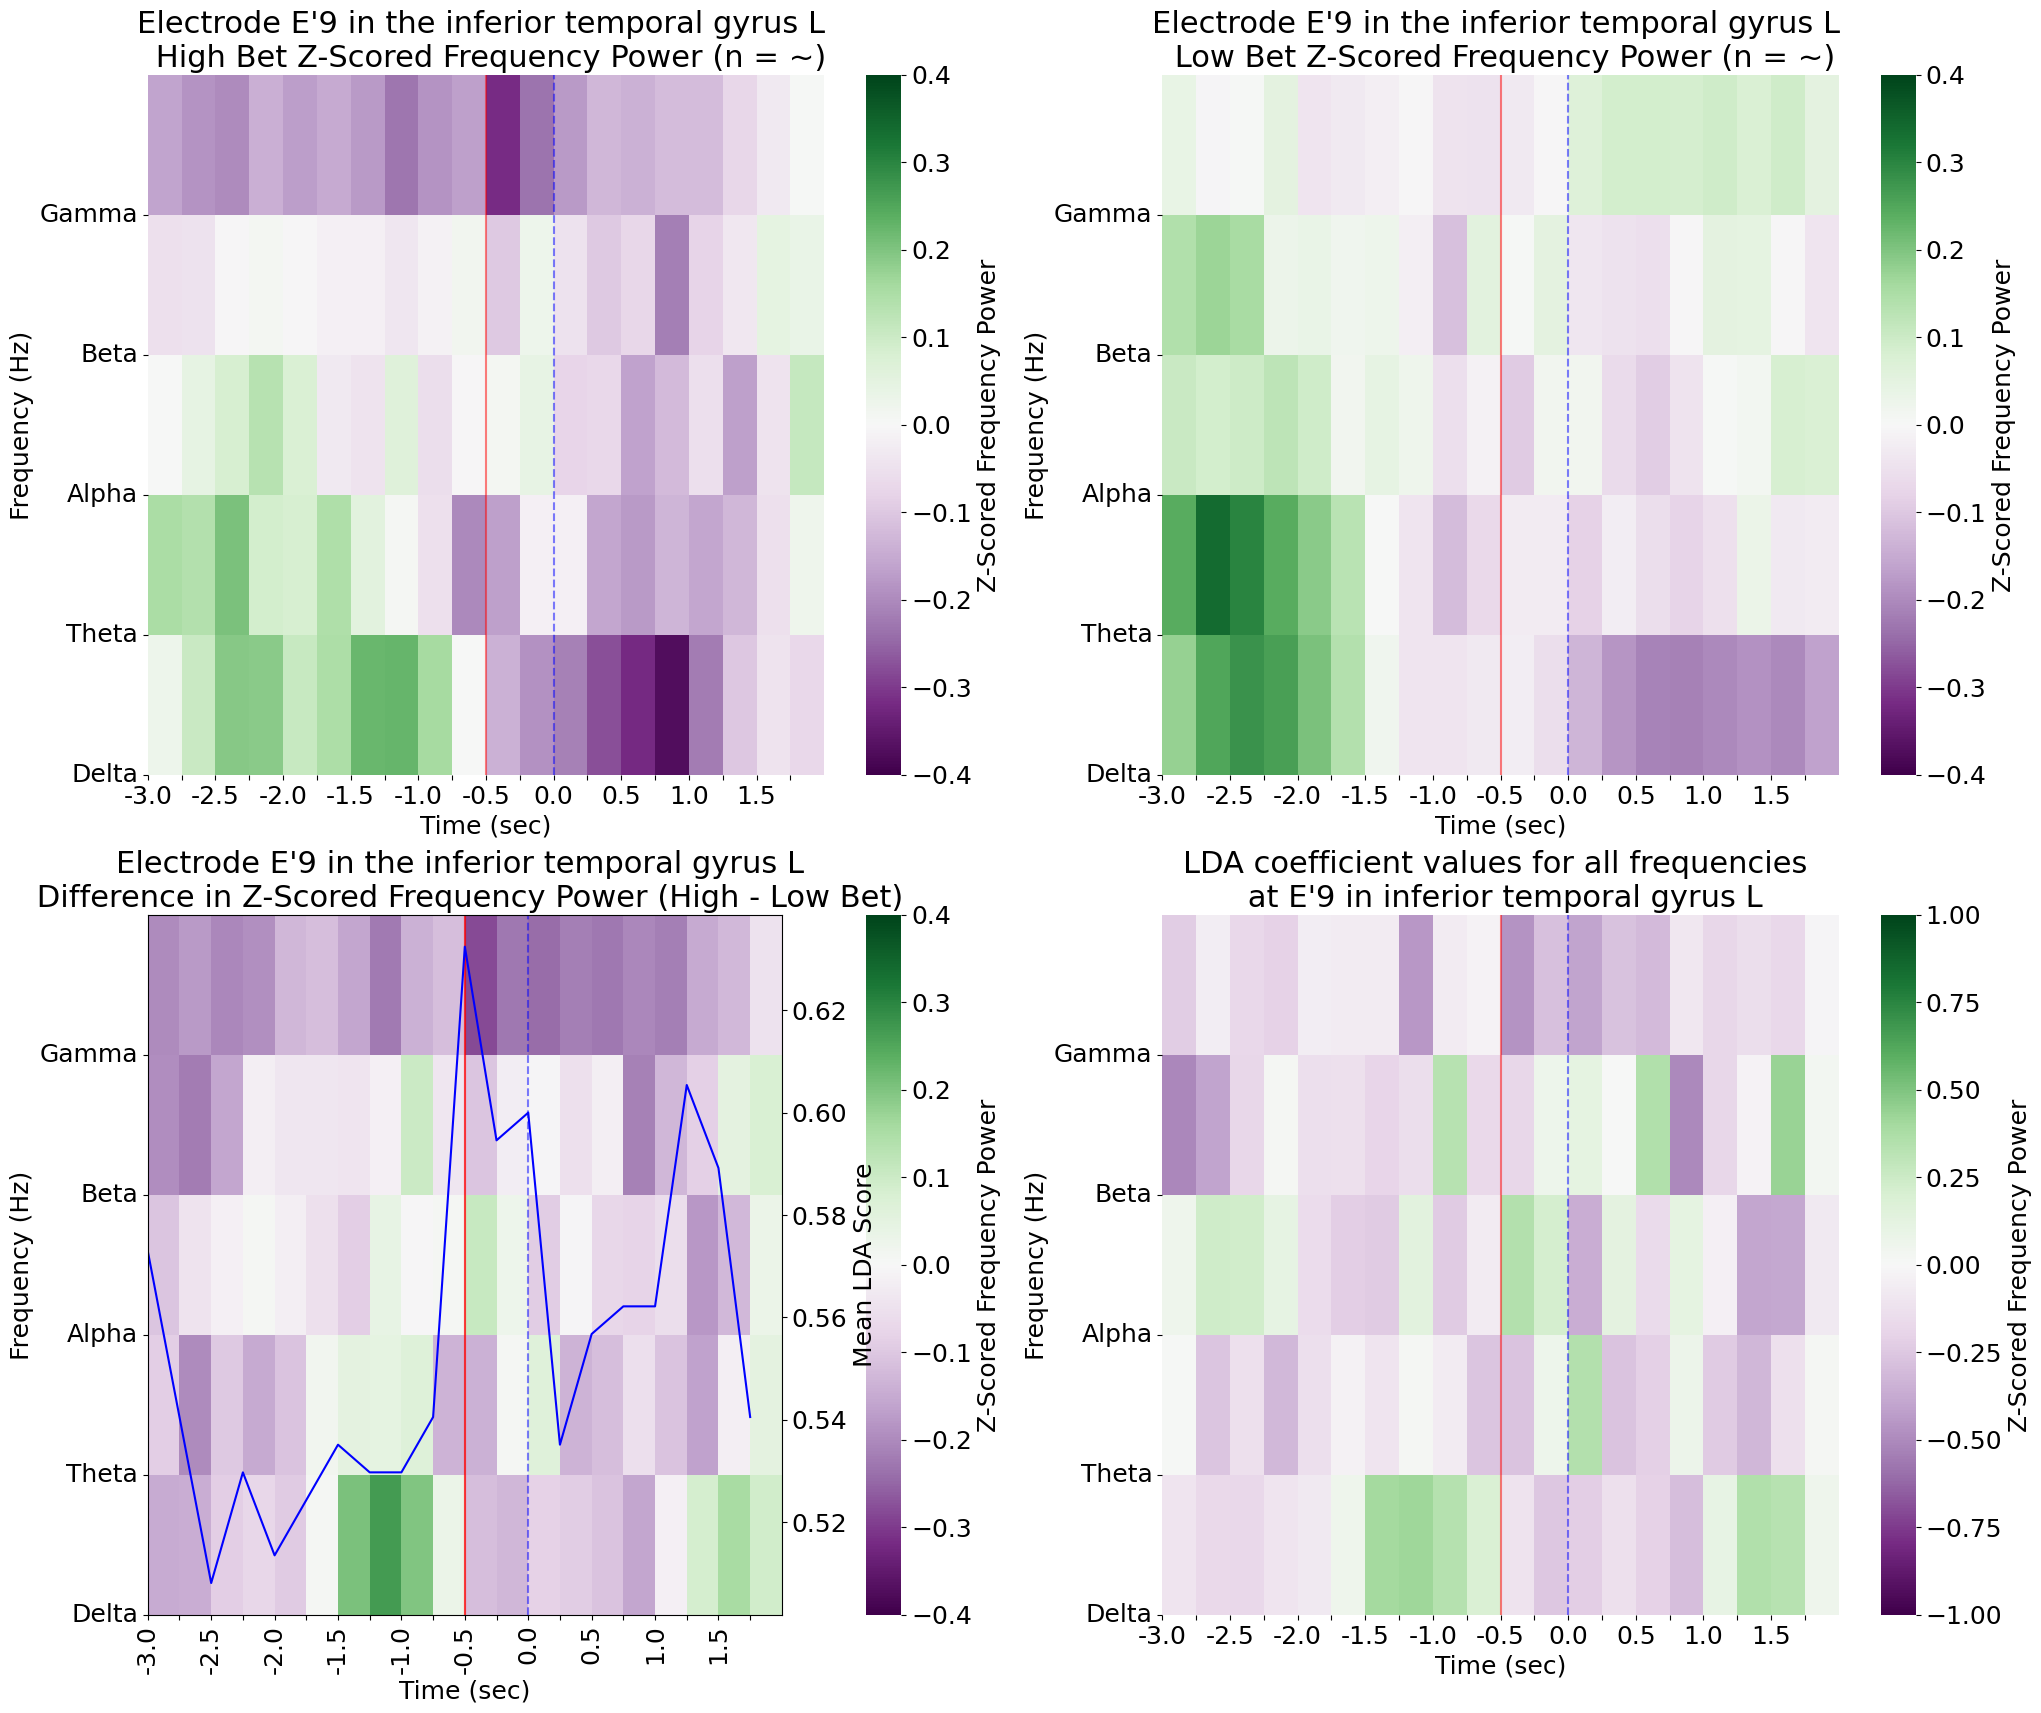

In [23]:
plots.plot_power_heatmap(lda.mean_scores,5,out_path_plots)

In [11]:
lda = LDA(setup_data=setup_data)
lda.train_on_all_channels(f_band_data, y, 5, True)

In [18]:
plots = PerTimestepAllChannels(lda)

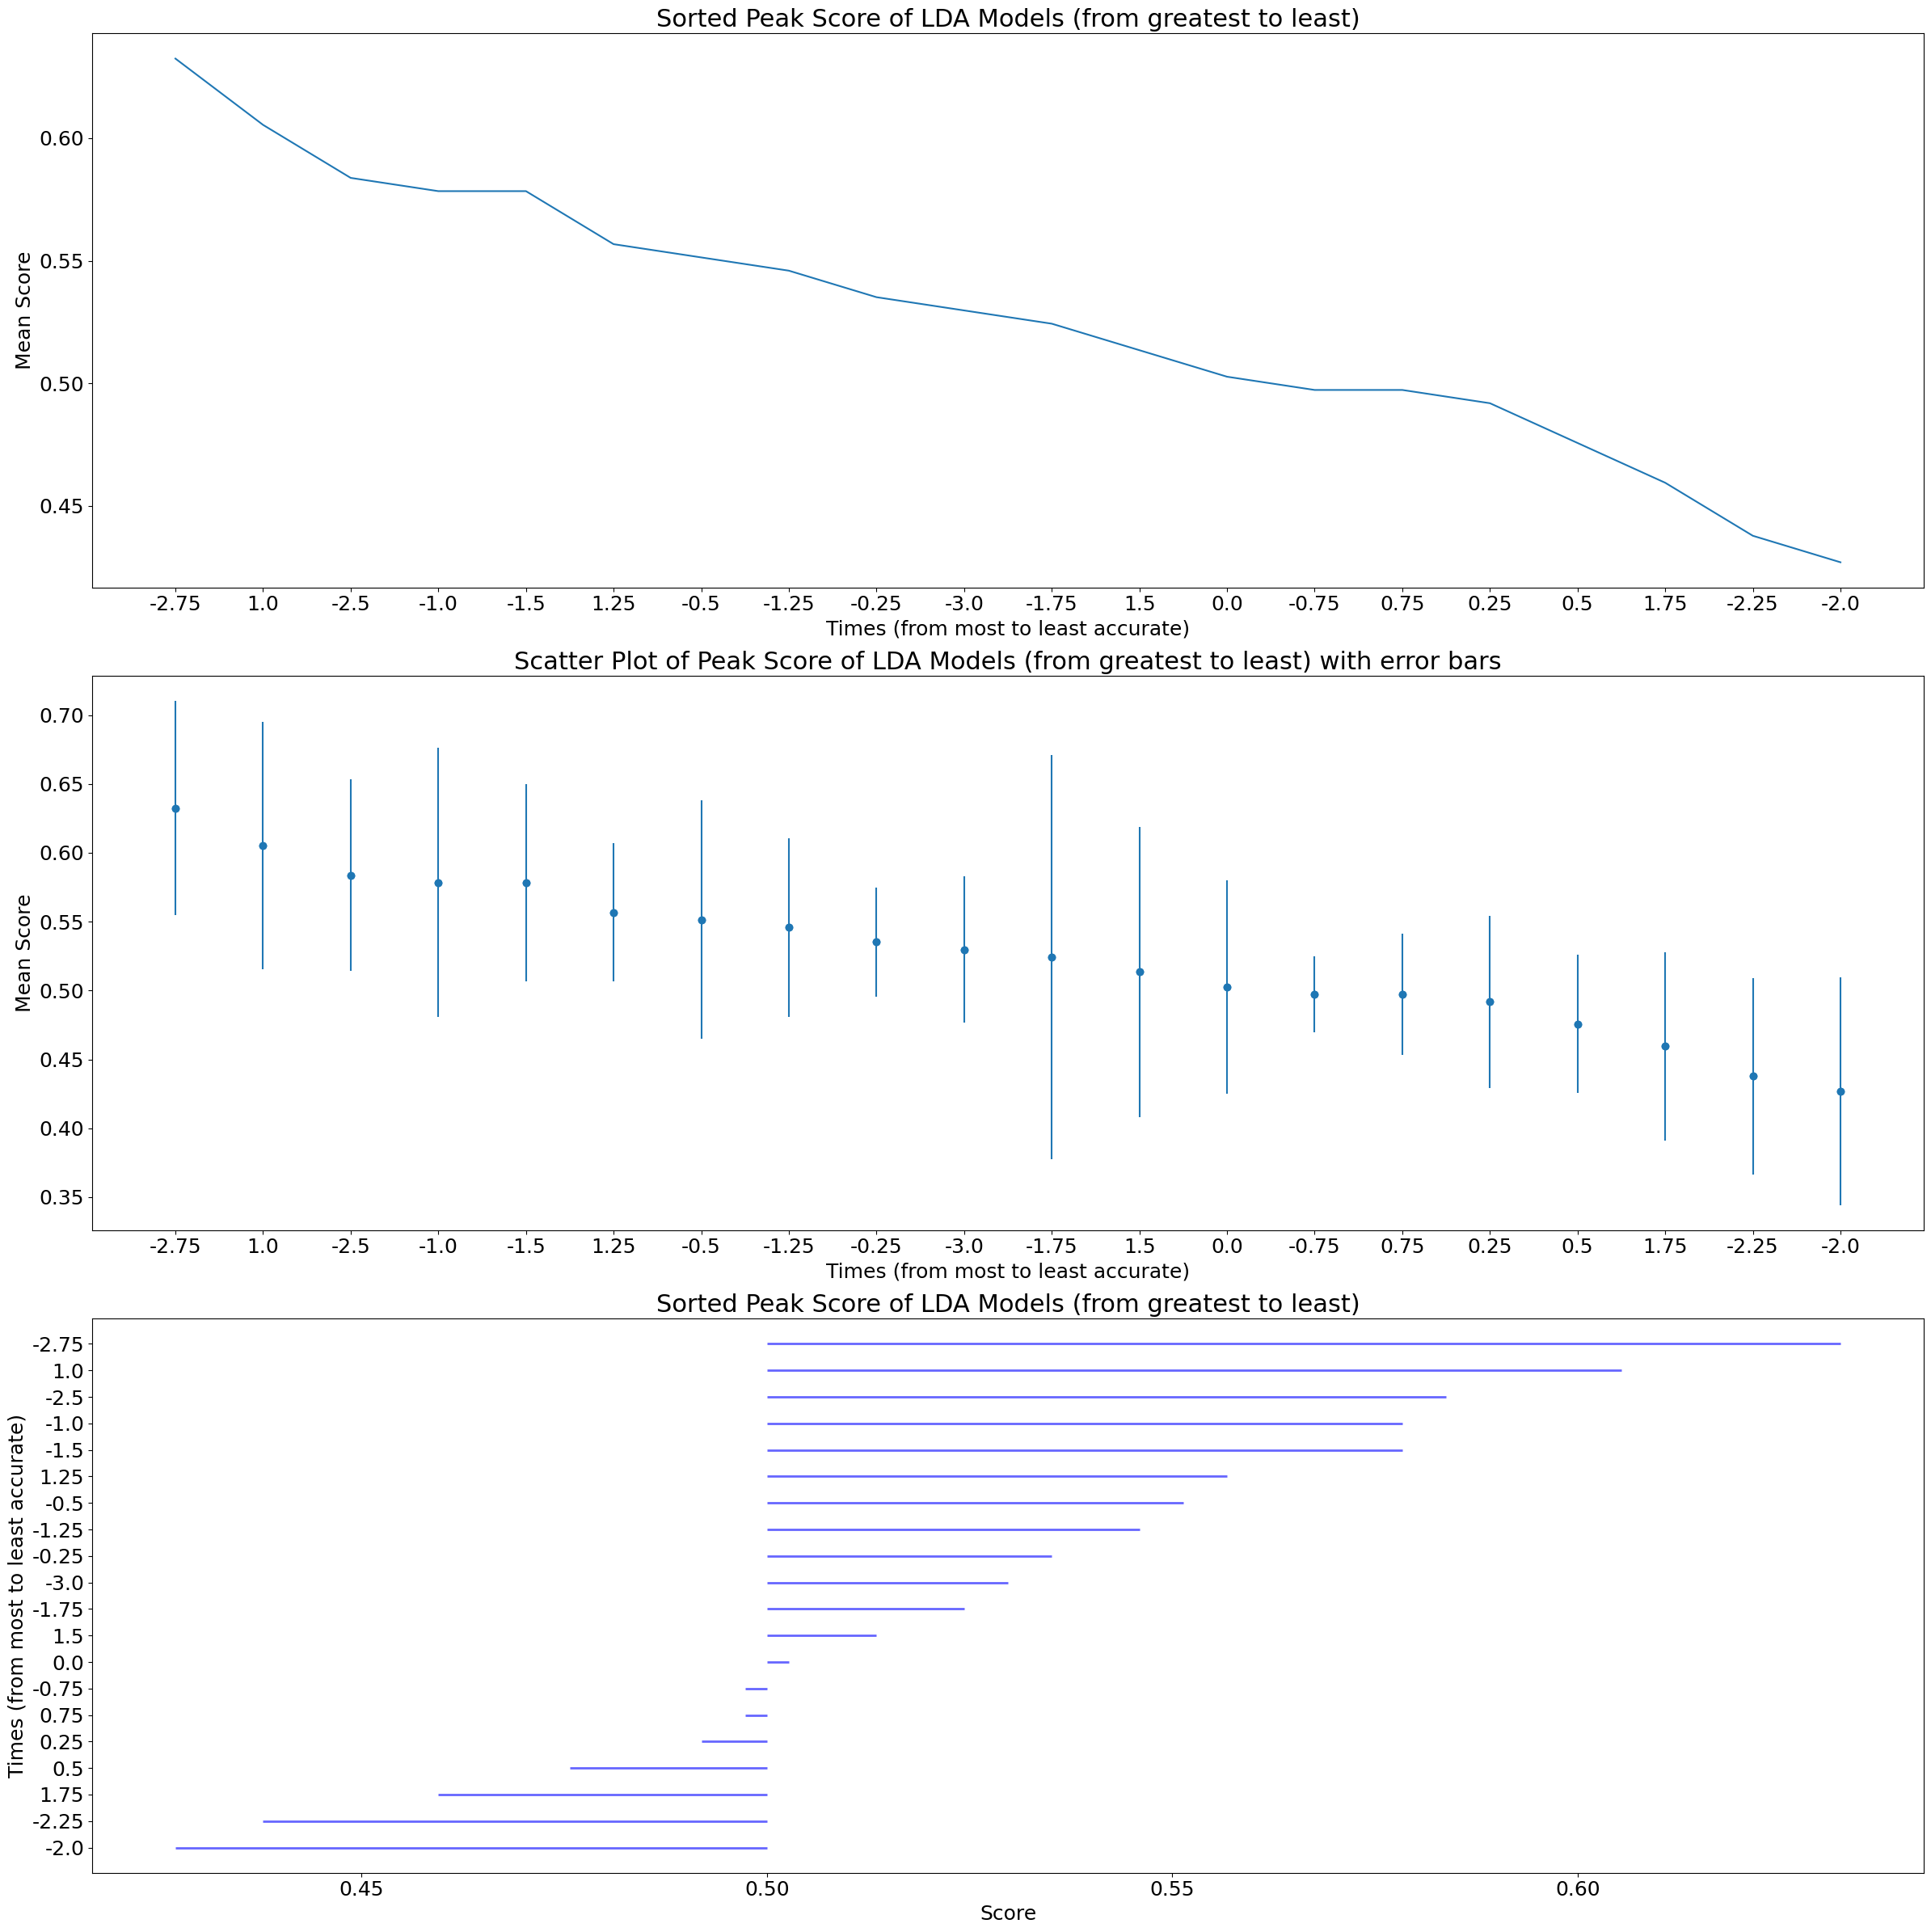

In [20]:
plots.plot_sorted_scores(out_path_plots)